<center><img src="https://wallpaperaccess.com/full/1308159.jpg" style="height:150px" alt="Amazon.com" class="center"></center>

- Domain - E-commerce
- Context - Everyday a million products are being recommended to users based on
popularity and other metrics on e-commerce websites. The most popular e-commerce
website boosts average order value by 50%, increases revenues by 300%, and
improves conversion. In addition to being a powerful tool for increasing revenues,
product recommendations are so essential that customers now expect to see similar
features on all other eCommerce sites.
- Data Description -
Data columns- First three columns are userId, productId, and ratings and the fourth
column is timestamp. You can discard the timestamp column as in this case you may
not need to use it.

- Learning Outcomes <br/>
Exploratory Data Analysis<br/>
Data Wrangling <br/>
Build a Popularity recommender model <br/>
Build Collaborative Filtering model <br/>

- Objective - To make a recommendation system that recommends at least five(5)
new products based on the user's habits.



<center style="background-color: #ECBA03"> Load libraries </center>

In [25]:
#loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

<center style="background-color: #ECBA03">  1. Read and explore the given dataset </center>

In [26]:
df = pd.read_csv('../First System/data_rating_Amazon.csv', names=['userId', 'productId','rating','timestamp'])
df.head()

,userId,productId,rating,timestamp
0,ARCED41J1JVB2,B00001ZWXA,5.0,1202601600
1,A319GUSEG4N2M9,B00001ZWXA,3.0,1162598400
2,A14TV2ZY8PMAQJ,B00001ZWXA,1.0,1234051200
3,A2WBFMOH9QTCZI,B00001ZWXA,4.0,1358467200
4,A2PB5LL9JA90Y4,B00001ZWXA,5.0,1324857600


In [27]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526772 entries, 0 to 526771
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     526772 non-null  object 
 1   productId  526772 non-null  object 
 2   rating     526772 non-null  float64
 3   timestamp  526772 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 20.1+ MB


In [28]:
df.shape

(526772, 4)

In [29]:
df.rating.describe()

count    526772.000000
mean          3.990489
std           1.393824
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

<center style="background-color:#ECBA03"> 2. Take a subset of the dataset to make it less sparse/ denser </center>

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(526772, 4)

In [32]:
df.drop(columns=["timestamp"], inplace=True)

In [33]:
# find minimum and maximum ratings
print('The minimum rating is: %d' %(df['rating'].min()))
print('The maximum rating is: %d' %(df['rating'].max()))

The minimum rating is: 1
The maximum rating is: 5


In [34]:
df.groupby('userId')['rating'].mean().sort_values(ascending=False).sample(10)  

userId
ARZV4K26Z9MZS     5.0
A1OMXYED55QS4D    1.0
A3W53O1ZYUV77U    4.0
APS4JVN7DH8BP     5.0
A17EV9A2S5DJV9    4.5
A3QJQYU4RIGQ8D    4.0
ARNTZOL8JK8DH     3.0
A3BEZMGX29I6W     3.0
A3OPSTH3910FSR    5.0
A2VB1Y6ANAFCS6    4.0
Name: rating, dtype: float64

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


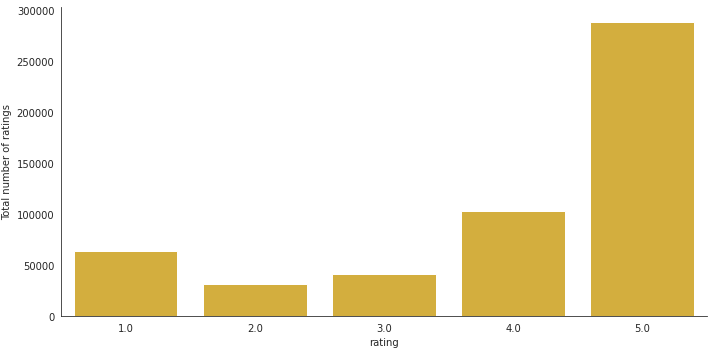

In [35]:
# check the Rating distribution in the range 1-5 for the Data given 

with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df, aspect=2.0,kind='count', color="#ECBA25")
    g.set_ylabels("Total number of ratings")

In [36]:
print("Total data ")
print("*"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.userId)))
print("Total No of products  :", len(np.unique(df.productId)))

Total data 
**************************************************

Total no of ratings : 526772
Total No of Users   : 423121
Total No of products  : 32170


In [37]:
#Keep the users where the user has rated more than 50 

counts1 = df['userId'].value_counts()
#print(counts1)
Data_new = df[df['userId'].isin(counts1[counts1 >= 25].index)]
Data_new

,userId,productId,rating
50,A2YHXGPCTENZY3,B0000206CN,3.0
64,ARXU3FESTWMJJ,B0000206CT,5.0
71,A23ZO1BVFFLGHO,B0000206CT,5.0
72,AY8Q1X7G96HV5,B0000206CW,4.0
75,A7Y6AVS576M03,B0000206DP,5.0
...,...,...,...
524998,AD8DLOGHAXL,B00030DEQE,5.0
525044,A2HPJKM7L4EOQB,B00030EE0Y,5.0
525069,A1EKSETIBS9ETQ,B00030EYSG,5.0
525275,A3REK3OFONWB1Q,B000329HEK,5.0


In [38]:
#highest rated products from the selected records. 

Data_new.groupby('productId')['rating'].mean().sort_values(ascending=False) 

productId
B00006LHRD    5.0
B0000DJEIP    5.0
B00006AE2W    5.0
B000069V27    5.0
B000069L6J    5.0
             ... 
B00006HOE6    1.0
B00006HQEI    1.0
B00006HQID    1.0
B00006HYJ2    1.0
B00009NFEP    1.0
Name: rating, Length: 2819, dtype: float64

In [39]:
#Calculate the density of the rating matrix

final_ratings_matrix = Data_new.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (78, 2819)
given_num_of_ratings =  3665
possible_num_of_ratings =  219882
density: 1.67%


In [40]:
final_ratings_matrix.head()

productId,9043413585,998376234X,B000000O48,B000001OL6,B000001OMN,B00000DM9M,B00000DM9R,B00000G20L,B00000IGBF,B00000J05A,...,B0003069Z2,B000309W6A,B000309YPO,B000309ZA8,B00030CHRQ,B00030DEQE,B00030EE0Y,B00030EYSG,B000329HEK,B00032CAA8
userId,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1435P5AMCPB3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A14JBDSWKPKTZA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A11D1KHM7DVOQK,A12DLJESJKM1OQ,A1435P5AMCPB3X,A149RNR5RH19YY,A14JBDSWKPKTZA,A14ME4FQBNFYWH,A1522TN5FVJL0Y,A15QYHQH80W30L,A1CPRP3VFJRS1R,A1EKSETIBS9ETQ,...,AGXV8E7XK9J6H,AHROSV6WJOEGY,AKT8TGIT6VVZ5,ALUNVOQRXOZIA,ARXU3FESTWMJJ,ASCM3206SVTO0,AT2J7H5TRZM8Z,AT6CZDCP4TRGA,AWPODHOB4GFWL,AY8Q1X7G96HV5
productId,,,,,,,,,,,,,,,,,,,,,
9043413585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998376234X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000000O48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000001OL6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000001OMN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<center style="background-color: #ECBA03">  3. Build Popularity Recommender model. </center>

In [42]:
#Count of user_id for each unique product as recommendation score 
Data_new_grouped = Data_new.groupby('productId').agg({'userId': 'count'}).reset_index()
Data_new_grouped.rename(columns = {'userId': 'score'},inplace=True)
Data_new_grouped.tail(200)

,productId,score
2619,B0002EQUL2,2
2620,B0002ER2YQ,1
2621,B0002ER2Z0,1
2622,B0002ER5B6,2
2623,B0002EXF1A,1
...,...,...
2814,B00030DEQE,1
2815,B00030EE0Y,1
2816,B00030EYSG,1
2817,B000329HEK,1


In [43]:
#Sort the products on recommendation score 
train_data_sort = Data_new_grouped.sort_values(['score', 'productId'], ascending = [0,1])

In [44]:
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
train_data_sort

,productId,score,Rank
234,B00004SB92,14,1.0
1531,B00007KDVI,9,2.0
508,B00004ZCJE,8,3.0
1683,B00008OE6I,8,4.0
729,B00005LEN4,7,5.0
...,...,...,...
2814,B00030DEQE,1,2815.0
2815,B00030EE0Y,1,2816.0
2816,B00030EYSG,1,2817.0
2817,B000329HEK,1,2818.0


In [45]:
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,score,Rank
234,B00004SB92,14,1.0
1531,B00007KDVI,9,2.0
508,B00004ZCJE,8,3.0
1683,B00008OE6I,8,4.0
729,B00005LEN4,7,5.0


In [46]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [47]:
find_recom = [15,21,53]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

      userId   productId  score  Rank
234       15  B00004SB92     14   1.0
1531      15  B00007KDVI      9   2.0
508       15  B00004ZCJE      8   3.0
1683      15  B00008OE6I      8   4.0
729       15  B00005LEN4      7   5.0


Here is the recommendation for the userId: 21

      userId   productId  score  Rank
234       21  B00004SB92     14   1.0
1531      21  B00007KDVI      9   2.0
508       21  B00004ZCJE      8   3.0
1683      21  B00008OE6I      8   4.0
729       21  B00005LEN4      7   5.0


Here is the recommendation for the userId: 53

      userId   productId  score  Rank
234       53  B00004SB92     14   1.0
1531      53  B00007KDVI      9   2.0
508       53  B00004ZCJE      8   3.0
1683      53  B00008OE6I      8   4.0
729       53  B00005LEN4      7   5.0




C:\Users\user\AppData\Local\Temp\ipykernel_11784\1458617337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['userId'] = user_id
C:\Users\user\AppData\Local\Temp\ipykernel_11784\1458617337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['userId'] = user_id
C:\Users\user\AppData\Local\Temp\ipykernel_11784\1458617337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

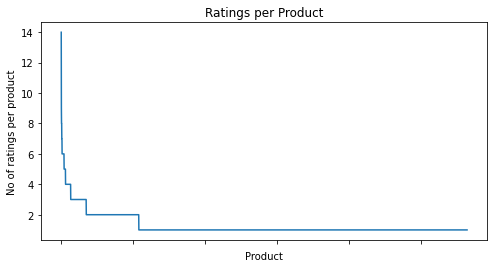

In [48]:
no_of_ratings_per_product = Data_new.groupby(by='productId')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('Ratings per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

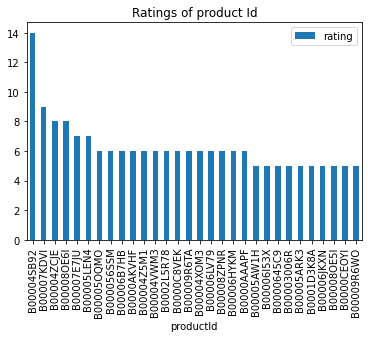

In [49]:
# Top 30 recommendations for the users

popular_products = pd.DataFrame(Data_new.groupby('productId')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar")
plt.title("Ratings of product Id")
plt.show()

<center style="background-color:#ECBA03"> 4. Split the data randomly into a train and test dataset.  </center>

In [54]:
from sklearn.neighbors import KNNWithMeans
from sklearn import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from collections import defaultdict

ModuleNotFoundError: No module named 'surprise'

In [27]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data1 = Dataset.load_from_df(Data_new,reader)
data1

In [28]:
#Splitting the dataset
trainset, testset = train_test_split(data1, test_size=0.3,random_state=123)

In [29]:
trainset.ur

defaultdict(list,
            {0: [(0, 1.0),
              (13, 4.0),
              (17, 2.0),
              (35, 5.0),
              (36, 3.0),
              (53, 3.0),
              (58, 1.0),
              (82, 5.0),
              (88, 4.0),
              (119, 3.0),
              (189, 4.0),
              (193, 3.0),
              (219, 5.0),
              (226, 1.0),
              (266, 4.0),
              (273, 4.0),
              (286, 2.0),
              (319, 2.0),
              (324, 5.0),
              (344, 1.0),
              (346, 1.0),
              (381, 3.0),
              (382, 4.0),
              (383, 2.0),
              (389, 5.0),
              (418, 5.0),
              (425, 5.0),
              (427, 4.0),
              (433, 4.0),
              (479, 2.0),
              (488, 1.0),
              (508, 3.0),
              (519, 1.0),
              (521, 2.0),
              (550, 3.0),
              (556, 4.0),
              (567, 1.0),
              (576, 3.0),
 

<center style="background-color:tomato"> Build Collaborative Filtering model </center>

In [30]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [31]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [32]:
test_pred

[Prediction(uid='A231WM2Z2JL0U3', iid='B00006B1HC', r_ui=5.0, est=4.1495798319327735, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A149RNR5RH19YY', iid='B000ARSLB8', r_ui=4.0, est=3.74468085106383, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AGXV8E7XK9J6H', iid='B0002XQWCK', r_ui=5.0, est=4.1495798319327735, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3OXHLG6DIBRW8', iid='B0002P4VHG', r_ui=3.0, est=4.355555555555555, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1F9Z42CFF9IAY', iid='B0006DPNNK', r_ui=4.0, est=4.1495798319327735, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A5JLAU2ARJ0BO', iid='B000056SRE', r_ui=5.0, est=4.1495798319327735, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3OXHLG6DIBRW8', iid='B00004Z5M1', r_ui=5.0, est=4.35555555555

<center style="background-color:tomato"> Get top - K ( K = 5) recommendations. </center>

In [33]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [34]:
top_n = get_top_n(test_pred, n=5)
top_n

defaultdict(list,
            {'A231WM2Z2JL0U3': [('B0000658CG', 5),
              ('B00006HCCK', 5),
              ('B00009Q96Z', 5),
              ('B000021YUO', 4.838932806324111),
              ('B0000AAAPF', 4.776223776223777)],
             'A149RNR5RH19YY': [('B00008RW8L', 4.1495798319327735),
              ('B00000JBAM', 4.1495798319327735),
              ('B0001FTVDQ', 4.1495798319327735),
              ('B0000DZET4', 4.1495798319327735),
              ('B00005QIPU', 4.1495798319327735)],
             'AGXV8E7XK9J6H': [('B0007Y794O', 4.374789915966386),
              ('B0002XQWCK', 4.1495798319327735),
              ('B0000CBBNM', 4.1495798319327735),
              ('B000A3WS16', 4.1495798319327735),
              ('B0001D3K8A', 4.1495798319327735)],
             'A3OXHLG6DIBRW8': [('B0002P4VHG', 4.355555555555555),
              ('B00004Z5M1', 4.355555555555555),
              ('B000067VBL', 4.355555555555555),
              ('B0002L5R78', 4.355555555555555),
              ('

In [35]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A231WM2Z2JL0U3 ['B0000658CG', 'B00006HCCK', 'B00009Q96Z', 'B000021YUO', 'B0000AAAPF']
A149RNR5RH19YY ['B00008RW8L', 'B00000JBAM', 'B0001FTVDQ', 'B0000DZET4', 'B00005QIPU']
AGXV8E7XK9J6H ['B0007Y794O', 'B0002XQWCK', 'B0000CBBNM', 'B000A3WS16', 'B0001D3K8A']
A3OXHLG6DIBRW8 ['B0002P4VHG', 'B00004Z5M1', 'B000067VBL', 'B0002L5R78', 'B0002VAQR4']
A1F9Z42CFF9IAY ['B0006DPNNK', 'B00062UKIY', 'B00006B7DA', 'B0002ILKMW', 'B000071A7U']
A5JLAU2ARJ0BO ['B00004SB92', 'B000087L74', 'B000056SRE', 'B00019OWSQ', 'B0009RGLSE']
A1JWSDDIH5Z7DV ['B0001XLS4S', 'B00006B80L', 'B00008WIX1', 'B0007OW5CK', 'B00006IS4N']
A11D1KHM7DVOQK ['B00000JCTD', 'B00061IYFQ', 'B0002VAQZQ', 'B0006ZF53Q', 'B0009H9PZU']
A1MJMYLRTZ76ZX ['B00004TDN2', 'B0009H5VVM', 'B000BKJZ9Q', 'B00006484F', 'B00008K4BD']
A2B7BUH8834Y6M ['B0000AAAPF', 'B0006U6GH0', 'B0000C8VEK', 'B0000AKVHF', 'B0006FTKYG']
A25HBO5V8S8SEA ['B00007KDVI', 'B00026KJ26', 'B00005ICE3', 'B00009R6TA', 'B0002DRNQO']
A203OCQQ12MAVT ['B0000511T7', 'B0002J2TLC', 'B0000E68U2'

In [36]:
uid = "A231WM2Z2JL0U3"  # raw user id (as in the ratings file). They are **strings**!
iid = "B00004RC2D"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=0.0, verbose=True)

user: A231WM2Z2JL0U3 item: B00004RC2D r_ui = 0.00   est = 4.15   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [37]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'A231WM2Z2JL0U3'][['iid', 'r_ui','est']].sort_values(by = 'est',ascending = False).head(10)

,iid,r_ui,est
731,B00009Q96Z,4.0,5.000000
535,B00006HCCK,5.0,5.000000
424,B0000658CG,5.0,5.000000
472,B000021YUO,5.0,4.838933
619,B0000AAAPF,3.0,4.776224
222,B0002B80EA,3.0,4.434552
325,B00008N6X4,2.0,4.434552
575,B00005ICE1,5.0,4.322003
634,B00004SCKA,4.0,4.322003
196,B000023VUL,5.0,4.295455


<center style="background-color:tomato">6. Evaluate the above model </center>

In [38]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.1338


1.1338276449333733

<center style="background-color:tomato"> 8. Summarise </center>

- Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

- The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history

- KNN with means recommender system if we have got user rating avaialable and popularity based in case of cold start